# Project: League of Legends Data Analysis
# Name: Vy Nguyen and Daniel Strub
# Class: CPSC322, Spring 2021

In [ ]:
# 1. Introduction  
The data set that we use in this project is [50,000 EUW ranked games of League of Legends] (https://www.kaggle.com/datasnaek/league-of-legends?select=games.csv) from 2017. Our goal is to predict the winner of a game based on important objectives which are first blood, first tower, first inhibitor, first baron, first dragon, and first rift herald. Furthermore, we found that random forest classifer is the best classifier compare to KNN and Naive Bayes.

# 2. Data Analysis  
The dataset size is 50,000 games but we cut it down to 15,000 games.The attributes use to predict which team will likely to win are first blood, first tower, first inhibitor, first baron, first dragon, and first rift herald. The class labels are 1 for team 1 and 2 for team 2. 


In [2]:
import importlib
import os
import copy
import random

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MySimpleLinearRegressor, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [3]:
game_fname = os.path.join("input_data", "games_small.csv")
game_table = MyPyTable()
game_table.load_from_file(game_fname)

winner = game_table.get_column("winner")
first_Blood = game_table.get_column("firstBlood")
first_Tower = game_table.get_column("firstTower")
first_Inhibitor = game_table.get_column("firstInhibitor")
first_Baron = game_table.get_column("firstBaron")
first_Dragon = game_table.get_column("firstDragon")
first_RiftHerald = game_table.get_column("firstRiftHerald")

game_X = [[first_Blood[x], first_Tower[x], first_Inhibitor[x], first_Baron[x], first_Dragon[x], first_RiftHerald[x]] for x in range(len(winner))]
game_Y = [y for y in winner]

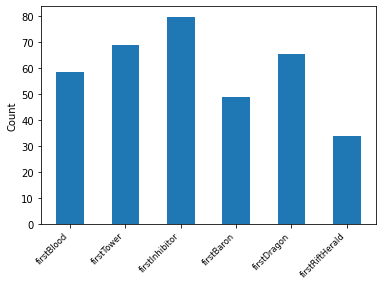

Figure 1


In [4]:
y_values = [round(myutils.get_win_count(game_table, "winner", "firstBlood") * 100, 2), round(myutils.get_win_count(game_table, "winner", "firstTower") * 100, 2),round(myutils.get_win_count(game_table, "winner", "firstInhibitor") * 100, 2),round(myutils.get_win_count(game_table, "winner", "firstBaron") * 100, 2), round(myutils.get_win_count(game_table, "winner", "firstDragon") * 100, 2), round(myutils.get_win_count(game_table, "winner", "firstRiftHerald") * 100, 2)]
myutils.bar_chart(["firstBlood", "firstTower", "firstInhibitor","firstBaron", "firstDragon", "firstRiftHerald"], y_values)

print("Figure 1")


Figure 1 showed that about 80% of games are won with first inhibitor which means that whichever team get the first inhibitor will most likely to win the game. However, about 45% of games are won with first rift herald but that means that the rift herald has less impact on the chance of winning. Notably, this chart only shows which objective has more impact to the win rate. With that in mind, we want to predict which team will likely to win based on the combinations of objectives.       

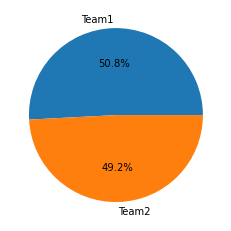

Figure 2


In [5]:
team1, team2 = myutils.team_win_count(game_table, "winner")
myutils.pie_chart(["Team1", "Team2"], [team1, team2])
print("Figure 2")


Look at figure 2, it is interesting that team 1 has a slightly higher win rate regardless of the attributtes that we used. Based on our experience of the game, team 1 has a better path to objectives which let them have a slight advantage over team 2.

# 3. Classification Result

In [ ]:
We use train_test_split method to generate X_test, X_train, Y_train, and Y-test then we use KNN, Naive Bayes, and Random Forest classifier to predict whichever team won. We implemented fit() and predict() function for each classifier and also build reusable functions in myutils.py to visualize the EDA as well as other helper functions for the 3 classifiers. Interestingly, we found that random forest classifier has the highest accuracy rate of 90% with random F,N, and M values while Naive Bayes classifier has a 89% accuracy rate and KNN classifier has a 50% accuracy rate.
[Example Link to Heroku App] (http://league-of-legends-cpsc322-s1.herokuapp.com/predict?first_blood=1&first_tower=1&first_inhib=2&first_baron=1&first_dragon=1&first_riftherald=1)

# 4. Conclusion 
Since random forest classifier has the highest accuracy rate and lowest error rate, we implement our Heroku app using random forest classifier. Notably, the original dataset were computation expensive due to the massive amount of instances so we have to reduce it from 50,000 to 15,000 games and manually get rid of attributes that aren't categorical. Lastly, we think that we could improve the performance of the dataset by get the data directly from Riot API and request data that are categorical and up-to-date since the dataset that we used is 4 years old.

